In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Read the Iris data
df=pd.read_csv("data/iris-data.csv")

In [3]:
#Check in case any null values in the dataset
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [12]:
#Currently dropping five null values from petal_width_cm.We can also impute it .
df=df.dropna(subset=["petal_width_cm"])

In [13]:
#Check the target 
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#Correct the spelling of Iris-setossa to Iris-setosa and versicolor to Iris-versicolor
df["class"].replace("Iris-setossa","Iris-setosa",inplace=True)
df["class"].replace("versicolor","Iris-versicolor",inplace=True)

In [7]:
#Check the frequency of target
df["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

In [15]:
#Find the X(All independent columns) and Y(Target variable) from df

X=df.iloc[:,:4]
Y=df["class"]

In [9]:
#Split the data into training and test data,here 80% data are training and 20% data are test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)


In [16]:
#Make all the features of same scale.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
#Import KNN library

from sklearn.neighbors import KNeighborsClassifier 

In [17]:
#Create the object of class and set the k=5
knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
#developed the KNN model
knn.fit(X_train,y_train)

#When p=2 and metric is minkowski meaning distance is euclidean.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
#Now predict the test dataset.
y_pred=knn.predict(X_test)

In [20]:
#Check the accuracy and getting 93% of accuracy when k=5

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93103448275862066

In [21]:
#Check the accuracy of k=1 to 25 and find to get better accuracy for what value of k. 
knn_accuracy=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    x=accuracy_score(y_test,y_pred)
    knn_accuracy.append(x)

In [22]:
#accuracy 1 meaning model is overfit so we are avoiding
print(knn_accuracy)

[0.93103448275862066, 0.93103448275862066, 0.93103448275862066, 0.93103448275862066, 0.93103448275862066, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96551724137931039, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


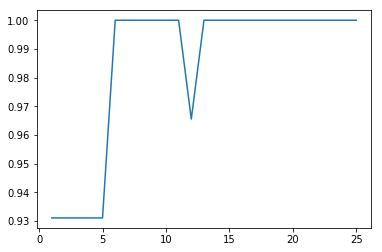

In [23]:
# We can have k=13 to get the better accuracy.
plt.plot(range(1,26),knn_accuracy)